In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

warnings.filterwarnings('ignore')

data1=pd.read_csv('/content/drive/MyDrive/Half_Data/ack_h.csv')
data2=pd.read_csv('/content/drive/MyDrive/Half_Data/benign_traffic_h.csv')
data3=pd.read_csv('/content/drive/MyDrive/Half_Data/combo_h.csv')
data4=pd.read_csv('/content/drive/MyDrive/Half_Data/junk_h.csv')
data5=pd.read_csv('/content/drive/MyDrive/Half_Data/scan_h.csv')
data6=pd.read_csv('/content/drive/MyDrive/Half_Data/syn_h.csv')
data7=pd.read_csv('/content/drive/MyDrive/Half_Data/tcp_h.csv')
data8=pd.read_csv('/content/drive/MyDrive/Half_Data/udp_h.csv')
data9=pd.read_csv('/content/drive/MyDrive/Half_Data/udpplain_h.csv')


data1['class']='ack'
data2['class']='benign'
data3['class']='combo'
data4['class']='junk'
data5['class']='scan'
data6['class']='syn'
data7['class']='tcp'
data8['class']='udp'
data9['class']='udpplain'


data=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9],

               axis=0, sort=False, ignore_index=True)

data.groupby('class')['class'].count()
data

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,class
0,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,...,0.0,0.0,1.00000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
1,1.996585,566.000000,5.820000e-11,1.997950,566.000000,5.820000e-11,1.999316,566.000000,0.000000e+00,1.999932,...,0.0,0.0,1.00000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
2,2.958989,566.000000,0.000000e+00,2.975291,566.000000,5.820000e-11,2.991729,566.000000,5.820000e-11,2.999171,...,0.0,0.0,1.00000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
3,3.958979,566.000000,0.000000e+00,3.975285,566.000000,0.000000e+00,3.991727,566.000000,1.160000e-10,3.999171,...,0.0,0.0,1.00000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
4,4.914189,566.000000,1.160000e-10,4.948239,566.000000,5.820000e-11,4.982654,566.000000,5.820000e-11,4.998261,...,0.0,0.0,1.00000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0,ack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813555,107.013362,451.270414,4.019486e+04,177.665918,416.233265,4.907493e+04,503.050021,389.699401,5.415282e+04,5226.131516,...,0.0,0.0,29900.27806,554.0,0.000062,554.0,3.840000e-09,0.0,0.0,udpplain
813556,108.012301,452.221506,3.991953e+04,178.664861,417.004355,4.890589e+04,504.049023,390.025362,5.409883e+04,5227.130480,...,0.0,0.0,29901.27747,554.0,0.000062,554.0,3.840000e-09,0.0,0.0,udpplain
813557,108.716218,453.157691,3.964675e+04,179.370847,417.768112,4.873728e+04,504.772381,390.350211,5.404482e+04,5227.843523,...,0.0,0.0,29902.11331,554.0,0.000062,554.0,3.780000e-09,0.0,0.0,udpplain
813558,109.580657,454.077947,3.937690e+04,180.236616,418.523962,4.856928e+04,505.646435,390.673856,5.399079e+04,5228.713068,...,0.0,0.0,29903.03870,554.0,0.000062,554.0,3.900000e-09,0.0,0.0,udpplain


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["class"]= le.fit_transform(data["class"])

In [ ]:
x = data.drop(columns = ['class'])
y = data['class']

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
813555    8
813556    8
813557    8
813558    8
813559    8
Name: class, Length: 813560, dtype: int64

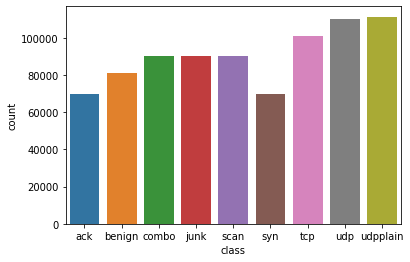

In [ ]:
sn.countplot(y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.09402864,  2.92023653, -0.49459129, ..., -0.08128532,
        -0.02999433, -0.01756778],
       [-1.0801538 ,  2.92023653, -0.49459129, ..., -0.08128532,
        -0.02999433, -0.01756778],
       [-1.06675484,  2.92023653, -0.49459129, ..., -0.08128532,
        -0.02999433, -0.01756778],
       ...,
       [ 0.40563836,  2.13892047,  1.3059045 , ..., -0.08128532,
        -0.02999433, -0.01756778],
       [ 0.41767341,  2.14529229,  1.29364967, ..., -0.08128532,
        -0.02999433, -0.01756778],
       [ 0.42324822,  2.15158298,  1.28147542, ..., -0.08128532,
        -0.02999433, -0.01756778]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x_scaled,y,test_size=.3,random_state=123)

In [ ]:
import numpy as np
from math import e

class Node:
    def __init__(self, x, gradient, hessian, idxs, subsample_cols = 0.8 , min_leaf = 5, min_child_weight = 1 ,depth = 10, lambda_ = 1, gamma = 1, eps = 0.1):
      
        self.x, self.gradient, self.hessian = x, gradient, hessian
        self.idxs = idxs 
        self.depth = depth
        self.min_leaf = min_leaf
        self.lambda_ = lambda_
        self.gamma  = gamma
        self.min_child_weight = min_child_weight
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.column_subsample = np.random.permutation(self.col_count)[:round(self.subsample_cols*self.col_count)]
        
        self.val = self.compute_gamma(self.gradient[self.idxs], self.hessian[self.idxs])
          
        self.score = float('-inf')
        self.find_varsplit()
    def compute_gamma(self, gradient, hessian):
        
        return(-np.sum(gradient)/(np.sum(hessian) + self.lambda_))
    def find_varsplit(self):
        
        for c in self.column_subsample: self.find_greedy_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(x = self.x, gradient = self.gradient, hessian = self.hessian, idxs = self.idxs[lhs], min_leaf = self.min_leaf, depth = self.depth-1, lambda_ = self.lambda_ , gamma = self.gamma, min_child_weight = self.min_child_weight, eps = self.eps, subsample_cols = self.subsample_cols)
        self.rhs = Node(x = self.x, gradient = self.gradient, hessian = self.hessian, idxs = self.idxs[rhs], min_leaf = self.min_leaf, depth = self.depth-1, lambda_ = self.lambda_ , gamma = self.gamma, min_child_weight = self.min_child_weight, eps = self.eps, subsample_cols = self.subsample_cols)
        
    def find_greedy_split(self, var_idx):
        
        x = self.x.values[self.idxs, var_idx]
        
        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            
            lhs_indices = np.nonzero(x <= x[r])[0]
            rhs_indices = np.nonzero(x > x[r])[0]
            if(rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf 
               or self.hessian[lhs_indices].sum() < self.min_child_weight
               or self.hessian[rhs_indices].sum() < self.min_child_weight): continue

            curr_score = self.gain(lhs, rhs)
            if curr_score > self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
    def weighted_qauntile_sketch(self, var_idx):
        
        x = self.x.values[self.idxs, var_idx]
        hessian_ = self.hessian[self.idxs]
        df = pd.DataFrame({'feature':x,'hess':hessian_})
        
        df.sort_values(by=['feature'], ascending = True, inplace = True)
        hess_sum = df['hess'].sum() 
        df['rank'] = df.apply(lambda x : (1/hess_sum)*sum(df[df['feature'] < x['feature']]['hess']), axis=1)
        
        for row in range(df.shape[0]-1):
            # look at the current rank and the next ran
            rk_sk_j, rk_sk_j_1 = df['rank'].iloc[row:row+2]
            diff = abs(rk_sk_j - rk_sk_j_1)
            if(diff >= self.eps):
                continue
            split_value = (df['rank'].iloc[row+1] + df['rank'].iloc[row])/2
            lhs = x <= split_value
            rhs = x > split_value
            
            lhs_indices = np.nonzero(x <= split_value)[0]
            rhs_indices = np.nonzero(x > split_value)[0]
            if(rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf 
               or self.hessian[lhs_indices].sum() < self.min_child_weight
               or self.hessian[rhs_indices].sum() < self.min_child_weight): continue
                
            curr_score = self.gain(lhs, rhs)
            if curr_score > self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = split_value
    def gain(self, lhs, rhs):
        
        gradient = self.gradient[self.idxs]
        hessian  = self.hessian[self.idxs]
        
        lhs_gradient = gradient[lhs].sum()
        lhs_hessian  = hessian[lhs].sum()
        
        rhs_gradient = gradient[rhs].sum()
        rhs_hessian  = hessian[rhs].sum()
        
        gain = 0.5 *( (lhs_gradient**2/(lhs_hessian + self.lambda_)) + (rhs_gradient**2/(rhs_hessian + self.lambda_)) - ((lhs_gradient + rhs_gradient)**2/(lhs_hessian + rhs_hessian + self.lambda_))) - self.gamma
        return(gain)
    @property
    def split_col(self):
        '''
        splits a column 
        '''
        return self.x.values[self.idxs , self.var_idx]
                
    @property
    def is_leaf(self):
        '''
        checks if node is a leaf
        '''
        return self.score == float('-inf') or self.depth <= 0
    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])
    
    def predict_row(self, xi):
        if self.is_leaf:
            return(self.val)

        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)
    
    
    
class XGBoostTree:
    def fit(self, x, gradient, hessian, subsample_cols = 0.8 , min_leaf = 5, min_child_weight = 1 ,depth = 10, lambda_ = 1, gamma = 1, eps = 0.1):
        self.dtree = Node(x, gradient, hessian, np.array(np.arange(len(x))), subsample_cols, min_leaf, min_child_weight, depth, lambda_, gamma, eps)
        return self
    
    def predict(self, x):
        return self.dtree.predict(x.values)
    
    
class XGBClassifier:
    def __init__(self):
        self.estimators = []
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    # first order gradient logLoss
    def grad(self, preds, labels):
        preds = self.sigmoid(preds)
        return(preds - labels)
    
    # second order gradient logLoss
    def hess(self, preds, labels):
        preds = self.sigmoid(preds)
        return(preds * (1 - preds))
    
    @staticmethod
    def log_odds(column):
        binary_yes = np.count_nonzero(column == 1)
        binary_no  = np.count_nonzero(column == 0)
        return(np.log(binary_yes/binary_no))
    def fit(self, x, y, subsample_cols = 0.8 , min_child_weight = 1, depth = 5, min_leaf = 5, learning_rate = 0.4, boosting_rounds = 5, lambda_ = 1.5, gamma = 1, eps = 0.1):
        self.x, self.y = x, y.values
        self.depth = depth
        self.subsample_cols = subsample_cols
        self.eps = eps
        self.min_child_weight = min_child_weight 
        self.min_leaf = min_leaf
        self.learning_rate = learning_rate
        self.boosting_rounds = boosting_rounds 
        self.lambda_ = lambda_
        self.gamma  = gamma
    
        self.base_pred = np.full((x.shape[0], 1), 1).flatten().astype('float64')
    
        for booster in range(self.boosting_rounds):
            Grad = self.grad(self.base_pred, self.y)
            Hess = self.hess(self.base_pred, self.y)
            boosting_tree = XGBoostTree().fit(self.x, Grad, Hess, depth = self.depth, min_leaf = self.min_leaf, lambda_ = self.lambda_, gamma = self.gamma, eps = self.eps, min_child_weight = self.min_child_weight, subsample_cols = self.subsample_cols)
            self.base_pred += self.learning_rate * boosting_tree.predict(self.x)
            self.estimators.append(boosting_tree)
          
    def predict_proba(self, x):
        pred = np.zeros(x.shape[0])
        
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(x) 
          
        return(self.sigmoid(np.full((x.shape[0], 1), 1).flatten().astype('float64') + pred))
    def predict(self, x):
        pred = np.zeros(x.shape[0])
        for estimator in self.estimators:
            pred += self.learning_rate * estimator.predict(x) 
        
        predicted_probas = self.sigmoid(np.full((x.shape[0], 1), 1).flatten().astype('float64') + pred)
        preds = np.where(predicted_probas > np.mean(predicted_probas), 1, 0)
        return(preds)

In [ ]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, x):
        # Mean centering
        self.mean = np.mean(x, axis=0)
        x = x - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(x.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, x):
        # project data
        x = x - self.mean
        return np.dot(x, self.components.T)

In [ ]:
pca = PCA(n_components=35)
pca.fit(x_scaled)
x_pca = pca.transform(x_scaled)
x_pca.shape

(813560, 35)

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3)

In [ ]:
import datetime
start = datetime.datetime.now()
my_model = XGBClassifier()
my_model.fit(x_train_pca, y_train)
end = datetime.datetime.now()
print("Total execution time on 35 features: ", end-start)

Total execution time on 35 features:  0:39:22.579938


In [ ]:
my_model.score(x_test_pca, y_test)*100


98.98511890128981

In [ ]:
confusion_m =  pd.crosstab(y_test,my_model.predict(x_test_pca))

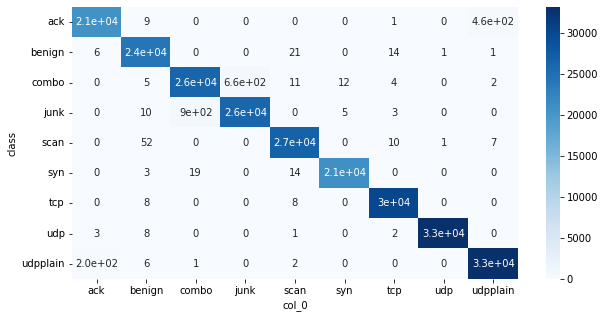

In [ ]:
fig = plt.figure(figsize=(10,5))

sn.heatmap(confusion_m,annot=True,cmap='Blues')

In [ ]:
print("Accuracy is: ",(np.diag(confusion_m).sum()/confusion_m.sum().sum())*100)

Accuracy is:  98.98511890128981


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
y_pred= my_model.predict(x_test_pca)

In [ ]:
print("Accuracy score on 20 features: ", accuracy_score(y_test,y_pred)*100)
print("Confusion matrix:\n ", confusion_matrix(y_test,y_pred))

Accuracy score on 20 features:  98.98511890128981
Confusion matrix:
  [[20632     9     0     0     0     0     1     0   460]
 [    6 24300     0     0    21     0    14     1     1]
 [    0     5 26351   663    11    12     4     0     2]
 [    0    10   899 26224     0     5     3     0     0]
 [    0    52     0     0 26750     0    10     1     7]
 [    0     3    19     0    14 20905     0     0     0]
 [    0     8     0     0     8     0 30194     0     0]
 [    3     8     0     0     1     0     2 33077     0]
 [  205     6     1     0     2     0     0     0 33158]]
